In [30]:
# base tools
import os, sys, random, cv2, glob
sys.path.append(os.path.join(".."))

from utils.imutils import jimshow
from utils.imutils import jimshow_channel

# data analysis
import numpy as np
from PIL import Image
from numpy.linalg import norm
from tqdm import tqdm

# tensorflow
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# style utils 
from utils.styletransfer import *

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [31]:
# Load TF-Hub module.
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [33]:
vangogh = []
for filename in glob.glob(os.path.join("data", "content_vangogh_style_vangogh", "*jpg")):
    vangogh.append(st_load(filename))

In [34]:
monet = []
for filename in glob.glob(os.path.join("data", "content_monet_style_monet", "*jpg")):
    monet.append(st_load(filename))

In [35]:
if len(monet) > len(vangogh):
    monet = monet[:len(vangogh)]
elif len(monet) < len(vangogh):
    vangogh = vangogh[:len(monet)]

In [36]:
vangogh = vangogh[:100]
monet = monet[:100]

In [37]:
random.shuffle(monet)
random.shuffle(vangogh)

In [208]:
content_vangogh_style_monet = []
content_monet_style_vangogh = []

# For pair of two images in image pairs
for van, mon in zip(vangogh, monet):
    
    # Get the generated images (as np.asarrays)
    content_vangogh_style_monet.append(np.asarray(hub_module(van, mon)[0][0])) # First argument is content image, second is style
    content_monet_style_vangogh.append(np.asarray(hub_module(mon, van)[0][0])) # First argument is content image, second is style

In [209]:
# Empty list for appending to
RGB = []

# Convert from BGR to RGB
for i in content_monet_style_vangogh:
    i = i[:,:,::-1]
    RGB.append(i)
    content_monet_style_vangogh = RGB

In [210]:
# Define function for resizing and making into array
def get_resized_arrays(arrays, width, height):
    # Empty list for appending to
    arrays_resized = []
    
    # For every array in the list of arrays
    for array in arrays:
        # Resize array
        resized = cv2.resize(array, (width, height), interpolation = cv2.INTER_AREA)

        # Append to list
        arrays_resized.append(resized)
            
    # Make into arrays with same dimensions instead of lists
    arrays_resized = np.array(arrays_resized).reshape(len(arrays_resized), width, height, 3)
    
    # Return
    return arrays

In [211]:
content_vangogh_style_monet = get_resized_arrays(content_vangogh_style_monet, 128, 128)
content_monet_style_vangogh = get_resized_arrays(content_monet_style_vangogh, 128, 128)

In [212]:
# Define function for saving the stylized images
def save_stylized(stylized_imgs, content_monet):
    # Initialize counter for unique names
    counter = 1
    
    # Defining outfolder
    if content_monet == True:
        # Create dir if not exist
        if not os.path.exists(os.path.join("data", "content_monet_style_vangogh")):
            os.mkdir(os.path.join("data", "content_monet_style_vangogh"))
            
        # Define outfolder for outpath
        outfolder = os.path.join("data", "content_monet_style_vangogh")
        
    else:
        # Create dir if not exist
        if not os.path.exists(os.path.join("data", "content_vangogh_style_monet")):
            os.mkdir(os.path.join("data", "content_vangogh_style_monet"))
            
        # Define outfolder for outpath
        outfolder = os.path.join("data", "content_vangogh_style_monet")
    
    # Saving stylized images
    for i in stylized_imgs:
        
        # Get unique filename ending
        counter += 1
        
        # Outpath
        outpath = os.path.join(outfolder, f"img_{counter}.jpg")
        
        # Saving
        cv2.imwrite(outpath, i*255) # Imwrite doesn't take values between 0 and 1, but rather 0 and 255

In [213]:
save_stylized(content_monet_style_vangogh, True)
save_stylized(content_vangogh_style_monet, False)

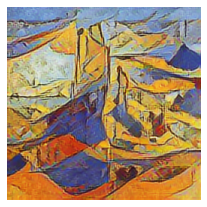

In [214]:
jimshow(content_monet_style_vangogh[0])